<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week7_Multiclass_support_ticket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.8.0/en_core_web_md-3.8.0-py3-none-any.whl (33.5 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


100%|██████████| 400/400 [00:02<00:00, 142.25it/s]



📋 BoW + KNN Classification Report:

              precision    recall  f1-score   support

     Billing       1.00      1.00      1.00        20
        Tech       1.00      1.00      1.00        20
     Inquiry       1.00      1.00      1.00        20
      Cancel       1.00      1.00      1.00        20

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



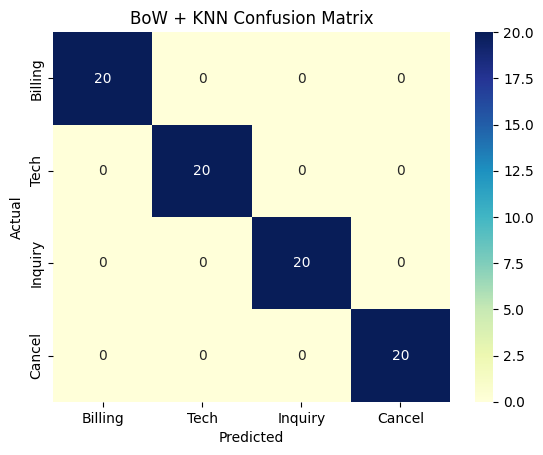


📋 TF-IDF + KNN Classification Report:

              precision    recall  f1-score   support

     Billing       1.00      1.00      1.00        20
        Tech       1.00      1.00      1.00        20
     Inquiry       1.00      1.00      1.00        20
      Cancel       1.00      1.00      1.00        20

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



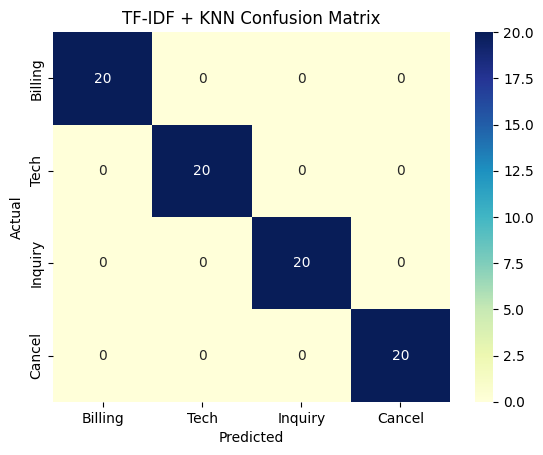


📋 Embeddings + KNN Classification Report:

              precision    recall  f1-score   support

     Billing       1.00      1.00      1.00        20
        Tech       1.00      1.00      1.00        20
     Inquiry       1.00      1.00      1.00        20
      Cancel       1.00      1.00      1.00        20

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



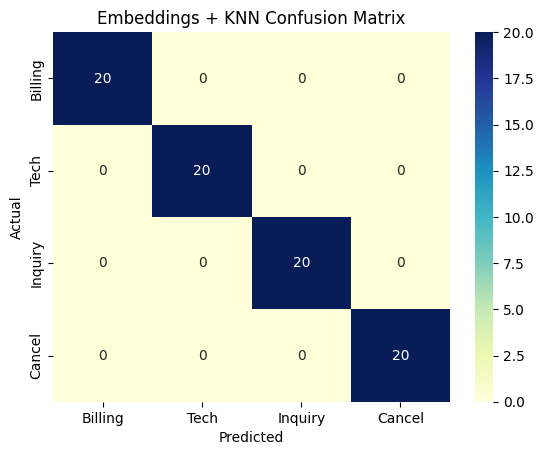

In [2]:
# 📦 Step 1: Import all required libraries
import pandas as pd, numpy as np, random, spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 🧠 Load spaCy model with word vectors
!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")

# 🧮 Define vectorizers (reusing spaCy tokenizer if needed)
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()


# 🧰 Step 1: Generate 400 synthetic support tickets across 4 categories
billing = [
    "Why was I charged twice?", "My bill seems incorrect.",
    "Can I get a refund?", "This transaction is unauthorized.",
    "I was billed after canceling.", "I need to update my payment info.",
    "Please explain this late fee.", "Where’s my invoice?",
    "I don’t recognize this charge.", "My receipt never arrived."
]
tech = [
    "The app keeps crashing.", "I can’t log into my account.",
    "Why is the website so slow?", "My password reset isn't working.",
    "The screen is blank after update.", "How do I sync my data?",
    "The button doesn’t respond.", "Getting error code 502.",
    "Audio isn’t playing correctly.", "Camera won’t turn on."
]
inquiry = [
    "What are your operating hours?", "Can I upgrade my plan?",
    "Do you offer student discounts?", "How does your service work?",
    "Where can I read the terms?", "I want to know more about features.",
    "Do you ship internationally?", "Is this available in Canada?",
    "How do I access archived files?", "What’s your privacy policy?"
]
cancel = [
    "I want to cancel my subscription.", "Please delete my account.",
    "How do I opt out of renewals?", "I no longer need the service.",
    "Cancel and confirm by email.", "Close my account immediately.",
    "Stop charging me going forward.", "How do I cancel auto-pay?",
    "Is my cancellation confirmed?", "End my plan today please."
]

data = {"message": [], "label": []}
for _ in range(100):
    data["message"].append(random.choice(billing))
    data["label"].append(0)  # Billing
    data["message"].append(random.choice(tech))
    data["label"].append(1)  # Tech
    data["message"].append(random.choice(inquiry))
    data["label"].append(2)  # Inquiry
    data["message"].append(random.choice(cancel))
    data["label"].append(3)  # Cancel

df_support = pd.DataFrame(data)

# 🧮 Step 2: Vectorize messages
X_bow_support = bow_vectorizer.fit_transform(df_support["message"])
X_tfidf_support = tfidf_vectorizer.fit_transform(df_support["message"])
X_embed_support = np.array([nlp(msg).vector for msg in tqdm(df_support["message"])])

# 🧪 Step 3: Run evaluations for customer support dataset
label_names = ["Billing", "Tech", "Inquiry", "Cancel"]

def eval_support(X, y, label_names, title=""):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📋 {title} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=label_names))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_names, yticklabels=label_names)
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📌 Step 4: Execute
eval_support(X_bow_support, df_support["label"], label_names, title="BoW + KNN")
eval_support(X_tfidf_support, df_support["label"], label_names, title="TF-IDF + KNN")
eval_support(X_embed_support, df_support["label"], label_names, title="Embeddings + KNN")

